In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

data = pd.read_csv('C:/Users/Diana/heart (1).csv')

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [38]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


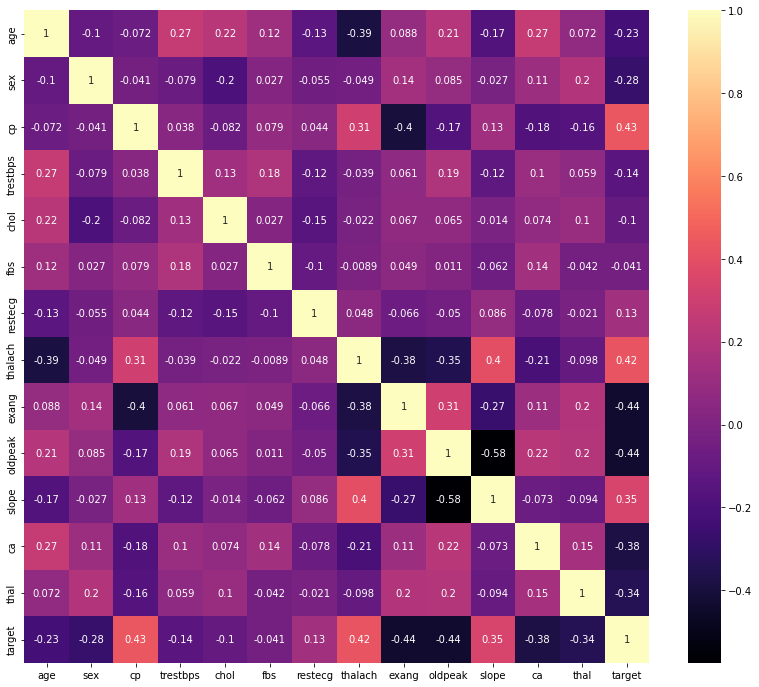

In [39]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True,cmap = 'magma')
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

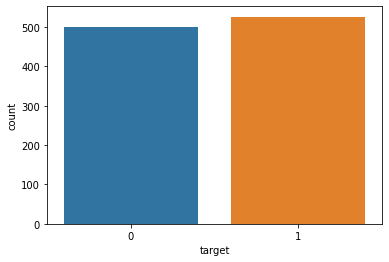

In [40]:
sns.countplot(data=data,x='target')

#### Splitting and normalizing the data 

In [41]:
X = data.copy().drop(['target'], axis=1)
y = data.copy()['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


### Logistic Regression 

In [42]:
model1 = LogisticRegression(penalty='l2', C=10, max_iter=1000)
model1.fit(X_train, y_train)

predictions1 = model1.predict(X_test)

accuracy1 = accuracy_score(y_test, predictions1)
print('Accuracy:', accuracy1)

feature_importances = model1.coef_
feature_importances

print("\nClassification Report:")
print(classification_report(y_test, predictions1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions1))

Accuracy: 0.7804878048780488

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205


Confusion Matrix:
[[70 32]
 [13 90]]


#### Cross Validation

In [43]:
scores1 = cross_val_score(model1, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores:', scores1)
print('Mean Accuracy:', scores1.mean())

Cross-Validation Scores: [0.88292683 0.86341463 0.86341463 0.82439024 0.80487805]
Mean Accuracy: 0.8478048780487806


#### GridSearch

In [44]:
warnings.filterwarnings('ignore')

param_grid1 = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter': [10, 100, 1000]}

grid_search1 = GridSearchCV(model1, param_grid1, cv=5)
grid_search1.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search1.best_params_)
print("Best score: ", grid_search1.best_score_)

y_pred1 = grid_search1.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred1))

Best hyperparameters:  {'C': 1, 'max_iter': 10, 'penalty': 'l2'}
Best score:  0.8487804878048781
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



### Ensemble model (LogisticRegression, RandomForest, SVM) 

In [45]:
logreg = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC(probability=True)  # Set probability=True for the VotingClassifier to work correctly

ensemble_model = VotingClassifier(
    estimators=[('logreg', logreg), ('rf', rf), ('svm', svm)],
    voting='soft'  # Use 'soft' voting to consider probabilities for decision making
)

ensemble_model.fit(X_train, y_train)

y_pred3 = ensemble_model.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy5)

print("\nClassification Report:")
print(classification_report(y_test, y_pred3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Accuracy: 0.9024390243902439

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       102
           1       0.86      0.96      0.91       103

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.91      0.90      0.90       205


Confusion Matrix:
[[86 16]
 [ 4 99]]


In [46]:
warnings.filterwarnings('ignore')

scores2 = cross_val_score(ensemble_model, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores:', scores1)
print('Mean Accuracy:', scores2.mean())

Cross-Validation Scores: [0.88292683 0.86341463 0.86341463 0.82439024 0.80487805]
Mean Accuracy: 0.9453658536585365


### XGBoost

In [47]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, predictions2)
print('Accuracy:', accuracy2)

print("\nClassification Report:")
print(classification_report(y_test, predictions2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions2))

Accuracy: 0.975609756097561

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205


Confusion Matrix:
[[100   2]
 [  3 100]]


In [48]:
scores3 = cross_val_score(model2, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores:', scores3)
print('Mean Accuracy:', scores3.mean())

Cross-Validation Scores: [0.9804878  1.         1.         1.         0.98536585]
Mean Accuracy: 0.9931707317073171


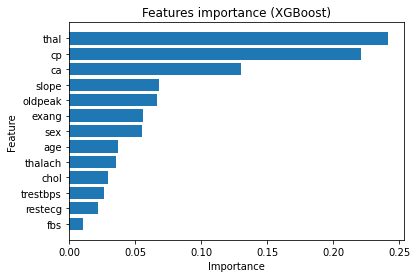

In [49]:
feature_importance = model2.feature_importances_

feature_names = X.columns
sorted_idx = np.argsort(feature_importance)

plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), feature_names[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features importance (XGBoost)')
plt.show()